In [1]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

def show_tensor_images(image_t,n_images=25,size=(1,28,28),nrow=5,show=True):
    image_t=(image_t+1)/2
    image_unflat=image_t.detach().cpu()
    image_grid=make_grid(image_unflat[:n_images],nrow=nrow)
    plt.imshow(image_grid.permute(1,2,0).squeeze())
    if show:
        plt.show()
        

In [23]:
class Generator(nn.Module):
    def __init__(self,input_dim=10,im_chan=1,hidden_dim=64):
        super(Generator,self).__init__()
        self.input_dim=input_dim
        self.gen=nn.Sequential(
            self.make_gen_block(input_dim, hidden_dim*4),
            self.make_gen_block(hidden_dim*4,hidden_dim*2,kernel_size=4,stride=1),
            self.make_gen_block(hidden_dim*2,hidden_dim),
            self.make_gen_block(hidden_dim,im_chan,kernel_size=4,final_layer=True),
            
        )
    def make_gen_block(self,input_channels,output_channels,kernel_size=3,stride=2,final_layer=False):
        if not final_layer:
            return nn.Sequential(
            nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
            nn.BatchNorm2d(output_channels),
            nn.ReLU(inplace=True),
            )
        else:
            return nn.Sequential(
            nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
            nn.Tanh(),
            )
        
    def forward(self,noise):
        x=noise.view(len(noise),self.input_dim,1,1)
        return self.gen(x)


    
def get_noise(n_samples,input_dim,device='cpu'):
    return torch.randn(n_samples,input_dim,device=device)

        
        

In [24]:
class Discriminator(nn.Module):
    def __init__(self,im_chan=1,hidden_dim=64):
        super(Discriminator,self).__init__()
        self.disc=nn.Sequential(
        self.make_disc_block(im_chan,hidden_dim),
        self.make_disc_block(hidden_dim,hidden_dim*2),
            self.make_disc_block(hidden_dim*2,1,final_layer=True),
        
        )
    def make_disc_block(self,input_channels,output_channels,kernel_size=4,stride=2,final_layer=False):
        if not final_layer:
            return nn.Sequential(
            nn.Conv2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2,inplace=True),
            )
        else:
            return nn.Sequential(
            nn.Conv2d(input_channels,output_channels,kernel_size,stride),
            )
    
    def forward(self,image):
        disc_pred=self.disc(image)
        return disc_pred.view(len(disc_pred),-1)
    

In [25]:
import torch.nn.functional as F
def get_one_hot_labels(labels,n_classes):
    return F.one_hot(labels,n_classes)

In [26]:
def combine_vector(x,y):
    combine=torch.cat((x,y),1).type(torch.float)
    return combine

In [27]:
mnist_shape=(1,28,28)
n_classes=10

In [28]:
criterion=nn.BCEWithLogitsLoss()
n_epochs=50
z_dim=64
display_step=500
batch_size=128
lr=0.0002
device='cuda'

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
    
])

dataloader=DataLoader(MNIST("P:\\dataset\\",download=False,transform=transform),
                     batch_size=batch_size,
                     shuffle=True)

In [32]:
generator_input_dim=z_dim+n_classes
discriminator_input_chan=mnist_shape[0]+n_classes

gen=Generator(input_dim=generator_input_dim).to(device)
gen_optm=torch.optim.Adam(gen.parameters(),lr=lr)
disc=Discriminator(im_chan=discriminator_input_chan).to(device)
disc_optm=torch.optim.Adam(disc.parameters(),lr=lr)

def weight_init(m):
    if isinstance(m,nn.Conv2d) or isinstance(m,nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight,0.0,0.02)
    if isinstance(m,nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight,0.,0.02)
        torch.nn.init.constant_(m.bias,0)

gen =gen.apply(weight_init)
disc=disc.apply(weight_init)

  0%|          | 0/469 [00:00<?, ?it/s]

Congratulations! If you've gotten here, it's working. Please let this train until you're happy with how the generated numbers look, and then go on to the exploration!


  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 2.1342350832223893, discriminator loss: 0.2843562383428216


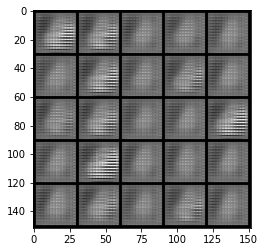

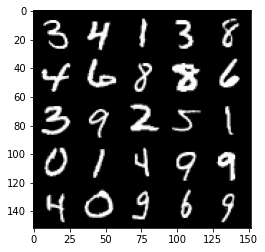

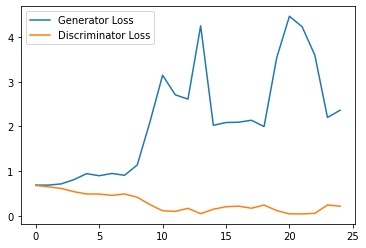

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 4.159114231586456, discriminator loss: 0.0810742241796106


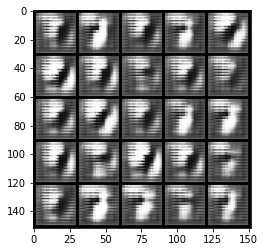

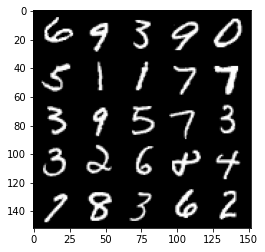

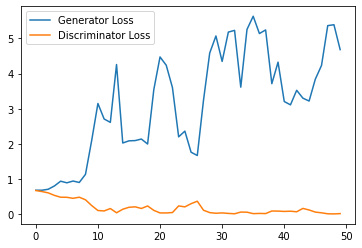

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 4.333689576625824, discriminator loss: 0.04415652826428414


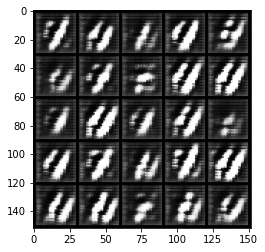

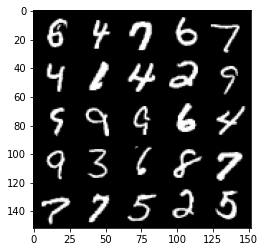

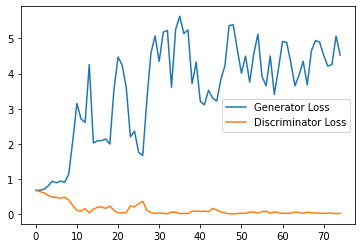

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 4.2355709252357485, discriminator loss: 0.05197935561649501


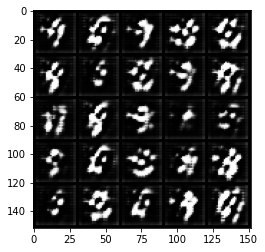

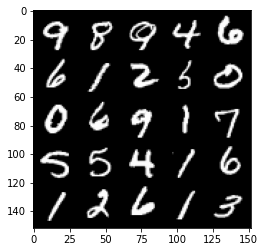

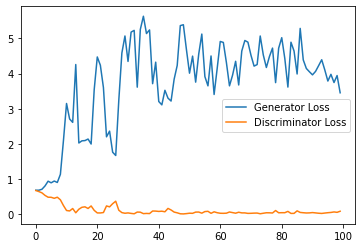

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 3.1963840889930726, discriminator loss: 0.1787023359835148


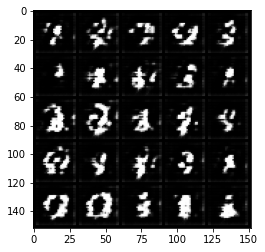

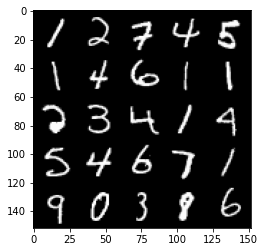

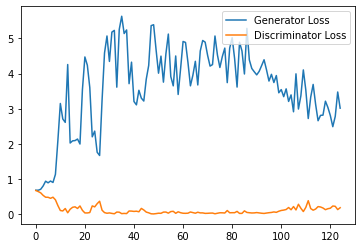

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 2.6021690566539766, discriminator loss: 0.2508579394519329


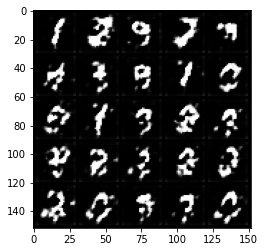

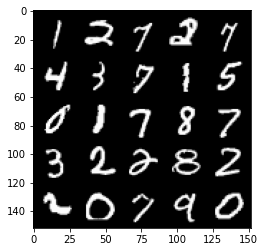

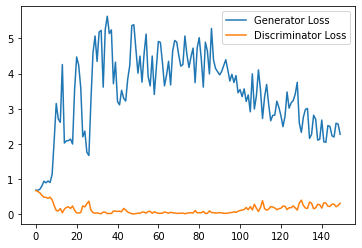

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 2.2797235333919526, discriminator loss: 0.3202799355536699


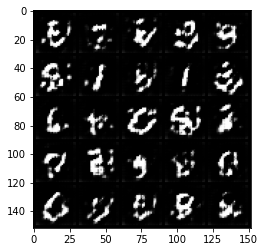

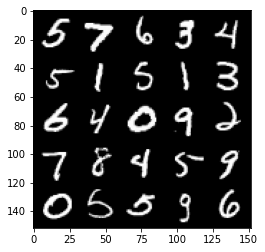

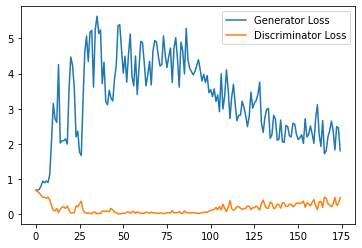

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 2.112309536933899, discriminator loss: 0.3236524253487587


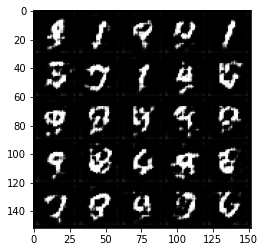

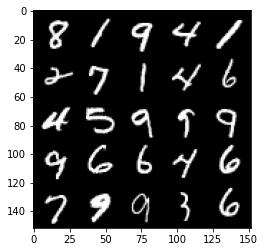

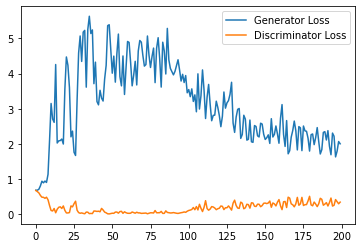

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 1.954014704465866, discriminator loss: 0.3444165875017643


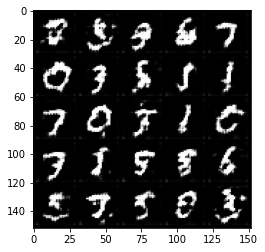

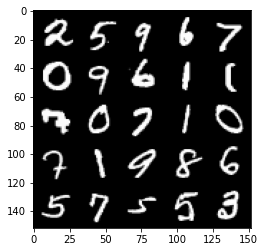

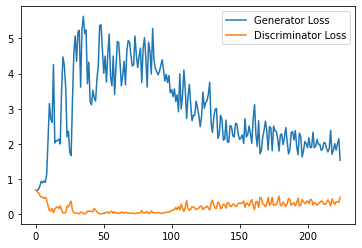

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 1.846927036523819, discriminator loss: 0.3702465834021568


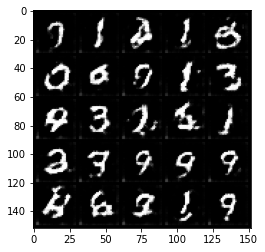

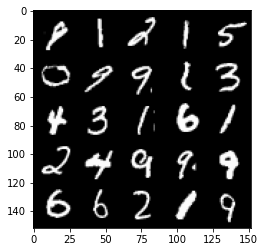

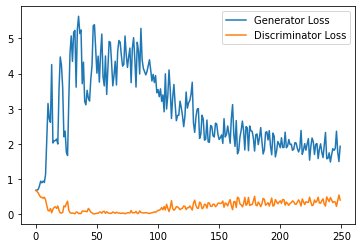

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 1.8131074517965318, discriminator loss: 0.4007731446325779


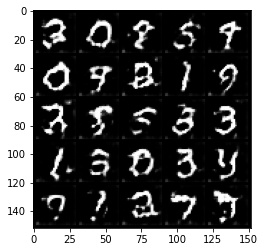

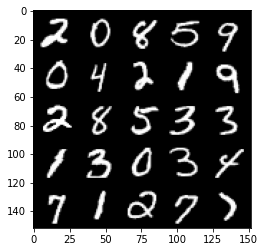

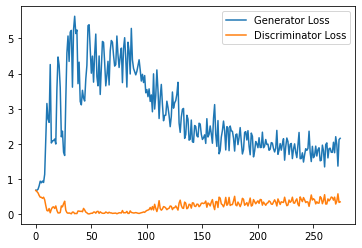

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 1.6138927989006042, discriminator loss: 0.4101028368473053


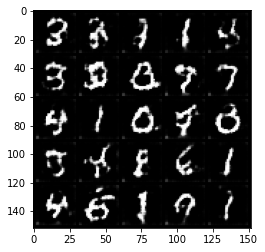

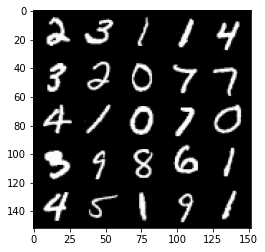

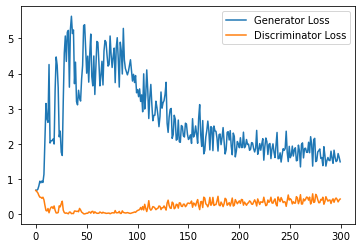

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 1.6539800261259079, discriminator loss: 0.4310274516940117


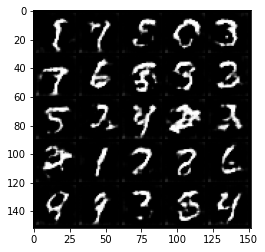

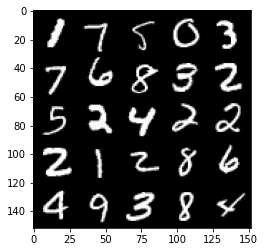

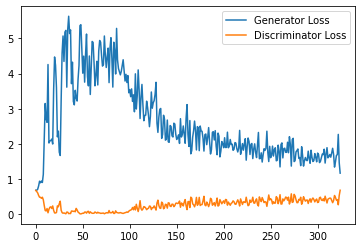

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 1.4484133991003036, discriminator loss: 0.45868564713001253


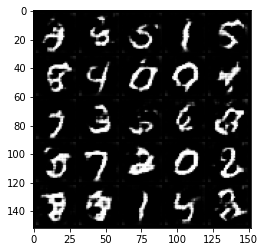

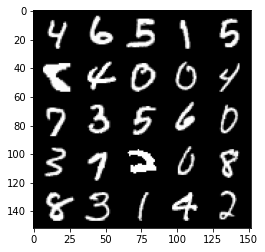

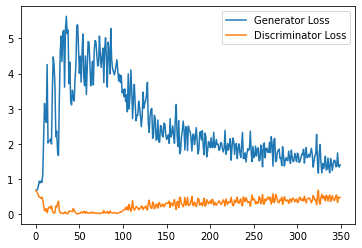

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 1.5183376348018647, discriminator loss: 0.48252100616693494


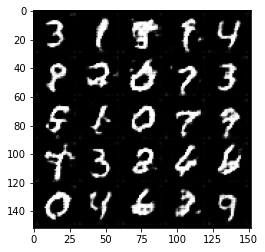

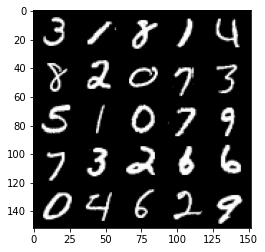

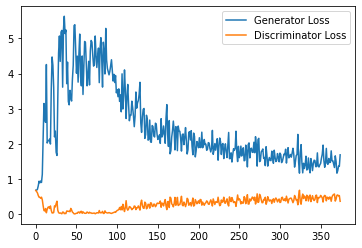

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 1.3108093700408936, discriminator loss: 0.49483056807518006


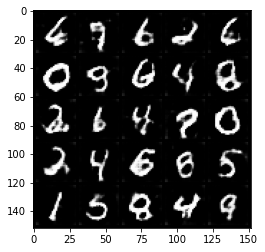

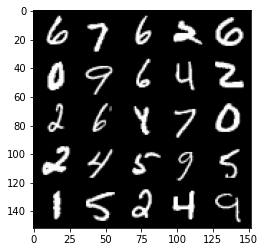

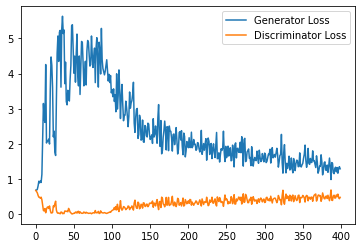

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 1.300859808564186, discriminator loss: 0.5160635802745819


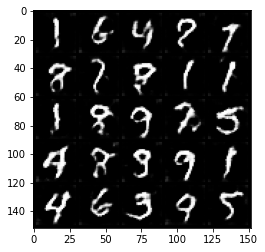

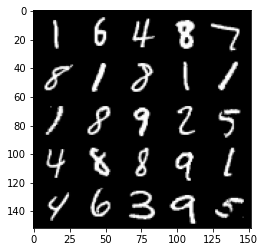

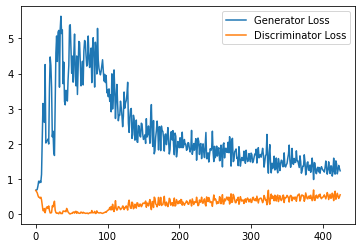

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 1.247325909972191, discriminator loss: 0.534203528881073


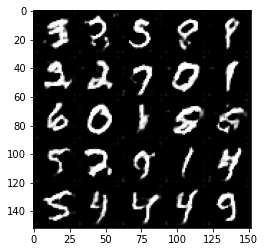

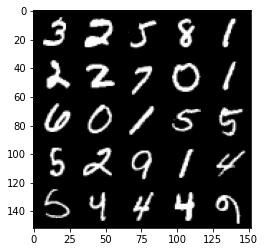

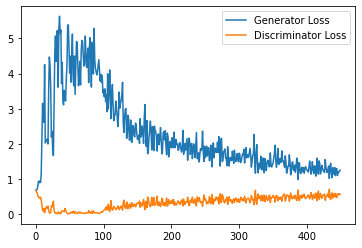

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 1.2290247464179993, discriminator loss: 0.5473614594936371


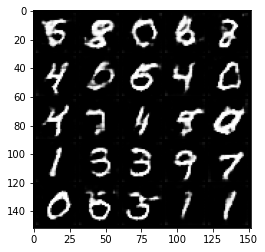

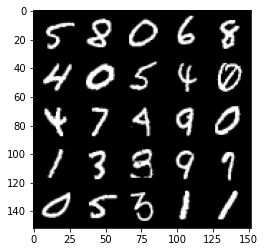

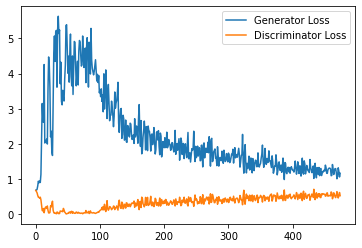

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 1.177195140361786, discriminator loss: 0.5554504600167275


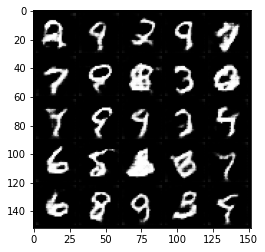

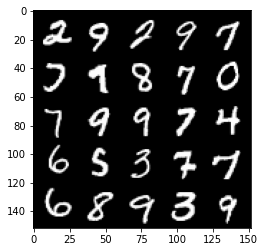

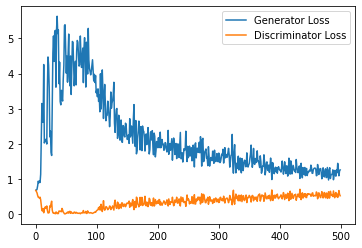

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 1.1874318169355393, discriminator loss: 0.5647967658042907


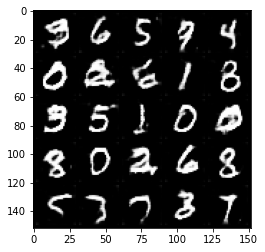

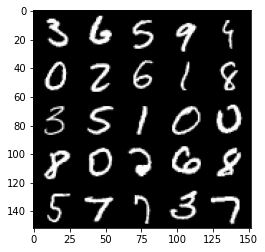

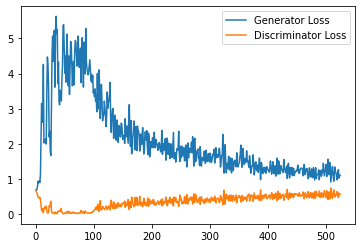

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 1.1216304204463958, discriminator loss: 0.5800587316155433


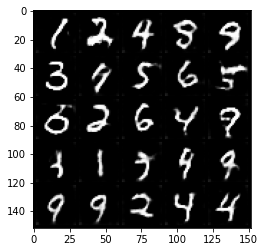

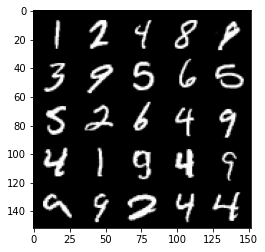

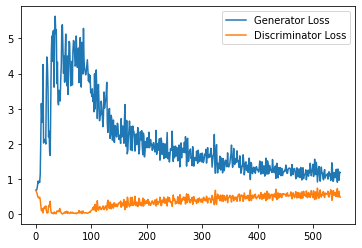

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 1.0799911711215973, discriminator loss: 0.5894492911696434


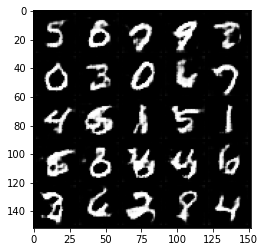

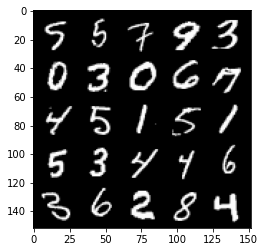

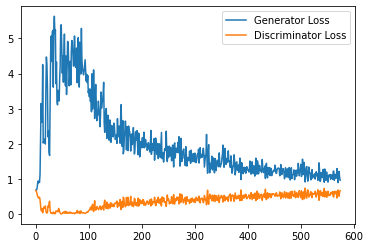

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 1.1066589249372483, discriminator loss: 0.5818913270831108


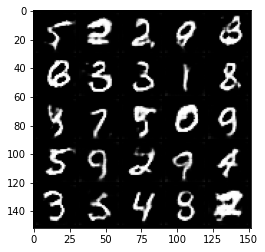

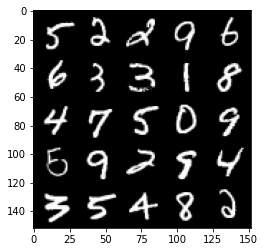

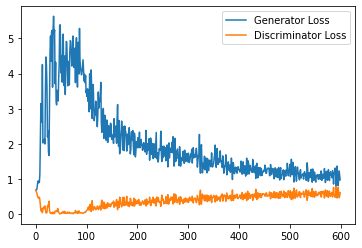

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 1.0646987137794495, discriminator loss: 0.589190602004528


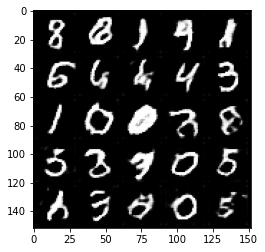

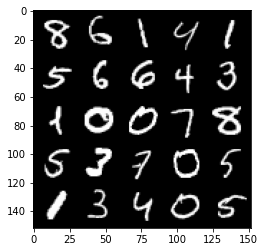

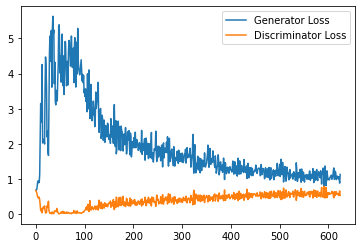

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 1.0131733582019806, discriminator loss: 0.592410384953022


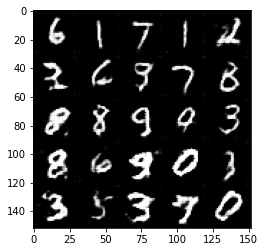

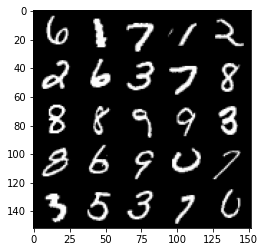

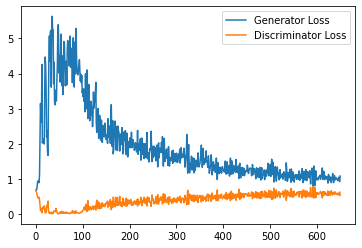

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 1.0476997847557068, discriminator loss: 0.5990003127455711


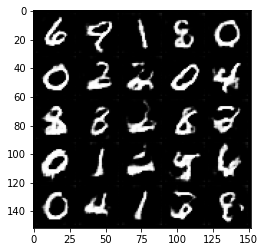

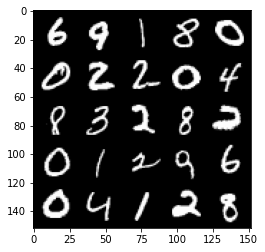

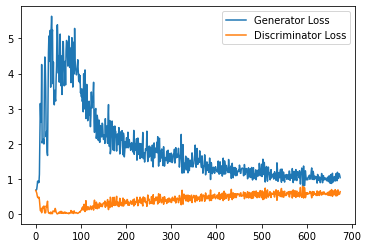

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 1.0886015453338622, discriminator loss: 0.5964633867144584


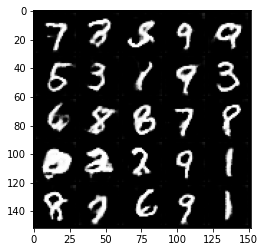

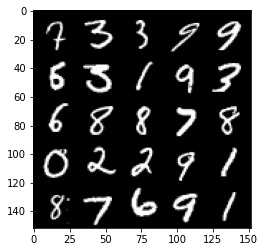

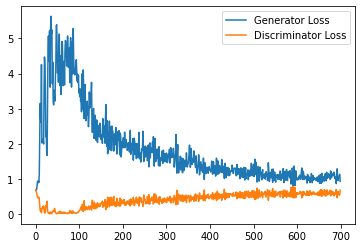

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 1.0799557777643203, discriminator loss: 0.590474281668663


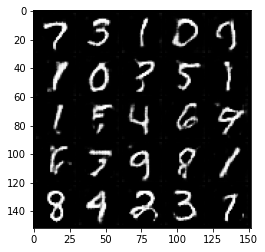

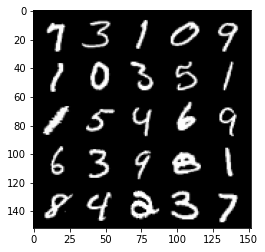

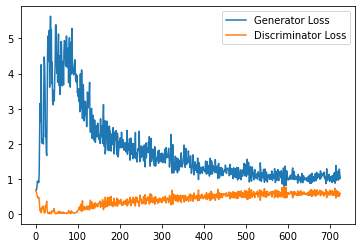

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 0.9846950317621231, discriminator loss: 0.6001145718097687


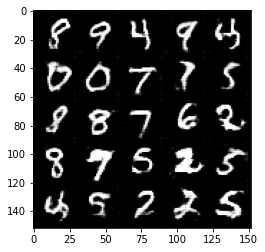

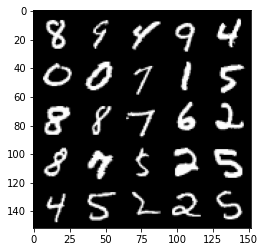

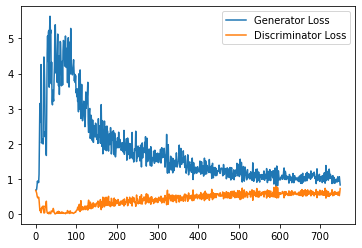

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator loss: 1.043994738817215, discriminator loss: 0.5895881688594818


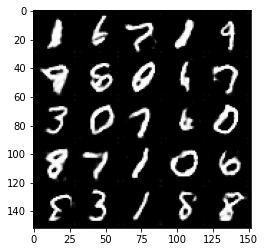

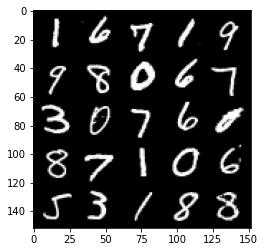

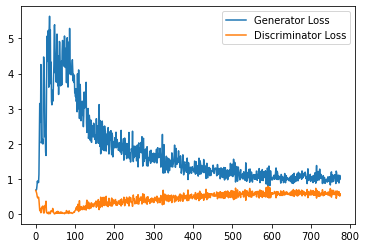

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator loss: 1.0291321355104446, discriminator loss: 0.5979775511026383


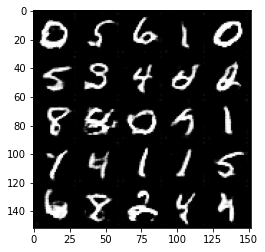

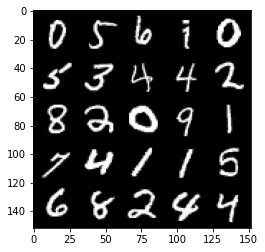

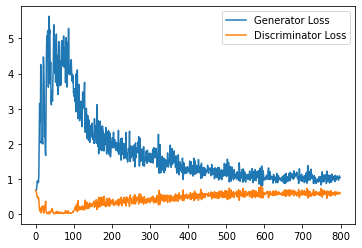

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator loss: 1.0044707871675491, discriminator loss: 0.6056455738544464


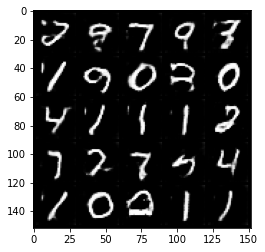

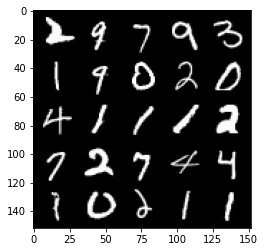

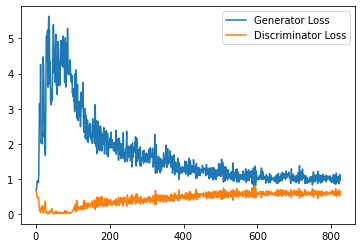

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator loss: 1.000752499938011, discriminator loss: 0.6017243884801865


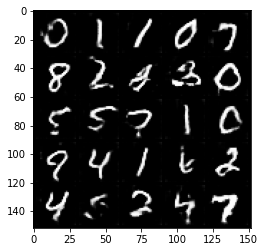

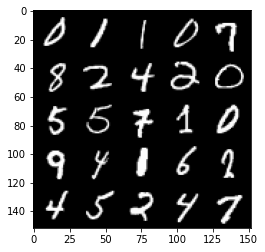

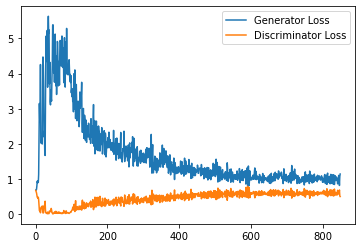

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator loss: 0.9967233244180679, discriminator loss: 0.6068823303580284


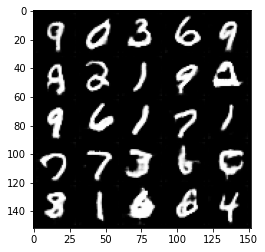

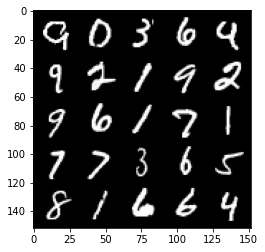

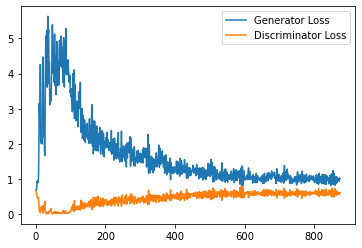

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator loss: 0.9965345023870468, discriminator loss: 0.6120831760764122


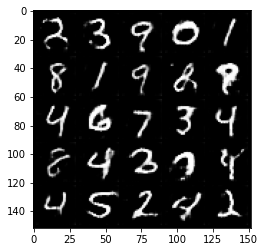

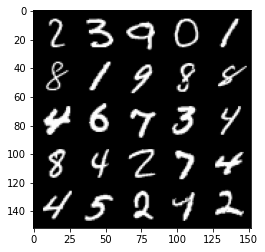

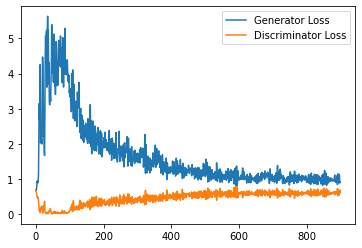

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator loss: 0.9965830190181733, discriminator loss: 0.6060667811632157


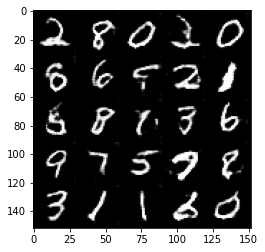

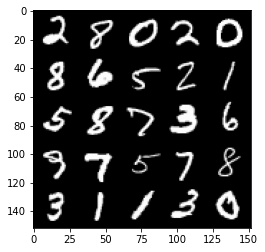

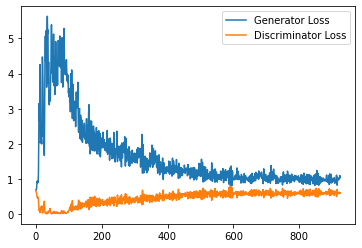

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19000: Generator loss: 1.001573657989502, discriminator loss: 0.6090410733222962


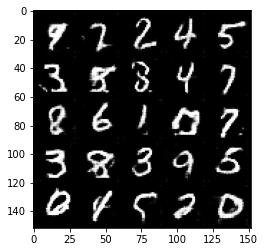

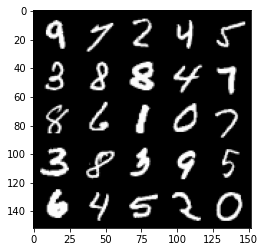

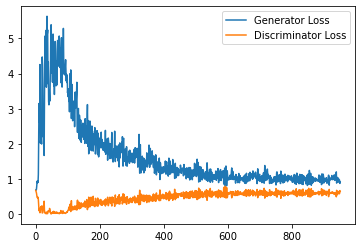

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19500: Generator loss: 0.9916047570705414, discriminator loss: 0.6066871670484543


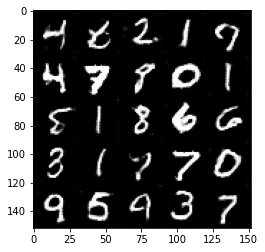

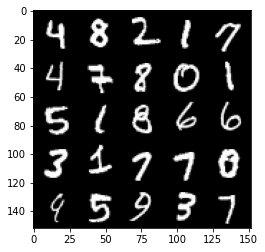

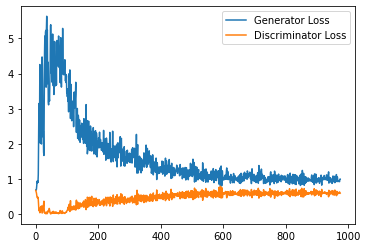

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator loss: 0.9703914470672608, discriminator loss: 0.5990001853704453


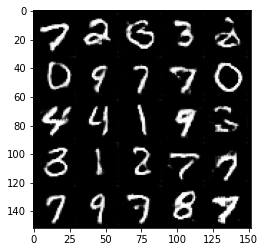

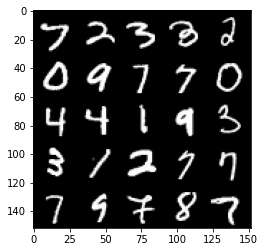

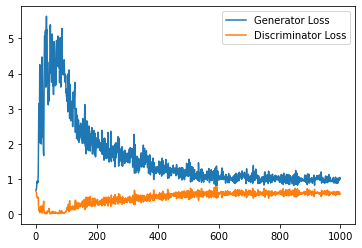

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20500: Generator loss: 0.9913683165311813, discriminator loss: 0.6072871257662773


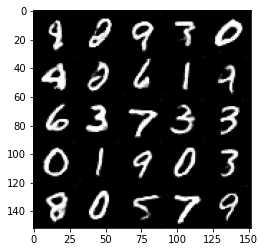

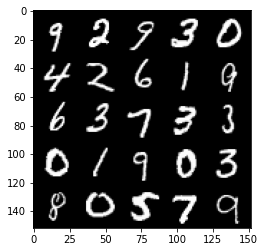

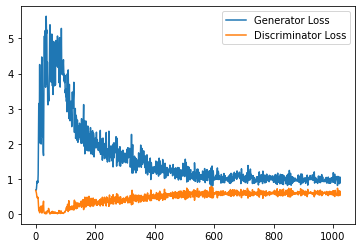

In [ ]:
cur_step=0
generator_losses=[]
discriminator_losses=[]

for epoch in range(n_epochs):
    for real,labels in tqdm(dataloader):
        cur_batch_size=len(real)
        real=real.to(device)
        
        one_hot_labels=get_one_hot_labels(labels.to(device),n_classes)
        image_one_hot_labels=one_hot_labels[:,:,None,None]
        image_one_hot_labels=image_one_hot_labels.repeat(1,1,mnist_shape[1],mnist_shape[2])
        
        disc_optm.zero_grad()
        
        fake_noise=get_noise(cur_batch_size,z_dim,device=device)
        
        noise_and_labels=combine_vector(fake_noise,one_hot_labels)
        fake=gen(noise_and_labels)
        
        fake_image_and_labels=combine_vector(fake.detach(),image_one_hot_labels)
        real_image_and_labels=combine_vector(real,image_one_hot_labels)
        disc_fake_pred=disc(fake_image_and_labels)
        disc_real_pred=disc(real_image_and_labels)
        
        
        disc_fake_loss=criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_loss=criterion(disc_real_pred,torch.ones_like(disc_real_pred))
        disc_loss=(disc_fake_loss+disc_real_loss)/2
        disc_loss.backward()
        disc_optm.step()
        
        discriminator_losses+=[disc_loss.item()]
        
        gen_optm.zero_grad()
        fake_image_and_labels=combine_vector(fake,image_one_hot_labels)
        disc_fake_pred=disc(fake_image_and_labels)
        gen_loss=criterion(disc_fake_pred,torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_optm.step()
        
        generator_losses+=[gen_loss.item()]
        if cur_step % display_step == 0 and cur_step > 0:
            gen_mean = sum(generator_losses[-display_step:]) / display_step
            disc_mean = sum(discriminator_losses[-display_step:]) / display_step
            print(f"Step {cur_step}: Generator loss: {gen_mean}, discriminator loss: {disc_mean}")
            show_tensor_images(fake)
            show_tensor_images(real)
            step_bins = 20
            x_axis = sorted([i * step_bins for i in range(len(generator_losses) // step_bins)] * step_bins)
            num_examples = (len(generator_losses) // step_bins) * step_bins
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(generator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Generator Loss"
            )
            plt.plot(
                range(num_examples // step_bins), 
                torch.Tensor(discriminator_losses[:num_examples]).view(-1, step_bins).mean(1),
                label="Discriminator Loss"
            )
            plt.legend()
            plt.show()
        cur_step += 1
        
        
        
        
        

In [ ]:
gen.eval()